# Exercise 10

## Exercise 10.1

The code was parallelised following the prescription of option 1. An extra parameter in the input file is used to tell the code wether to perform the parallel simulations indipendently or exchange best paths between random processors once every a given number of steps (hard coded)

The communication is handled using the MPI_Send and MPI_Recv functions, called every "migrateEvery" steps, then, after the exchange, the system is evolved one steps and a counter is reset to zero. The counter is increased by one every evolution without communication step, and the Migrate variable is set to true after reaching said number of steps

## Exercise 10.2

For simpler access to files in the src folder variables containing the path to those folders are defined

In [1]:
src_path = "../../src/lab10/"
distance_path = src_path+"out/"
paths_path = distance_path+"path/"

Loading required packages

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

Loading the output file parser

In [3]:
from read_tsp import *

The following variable simply stores the filenames of the distance sequnces from each processor

In [4]:
distances = [item for item in os.listdir(distance_path) if os.path.isfile(os.path.join(distance_path, item))]

Those distances are then plotted in a single graph for quick comparison

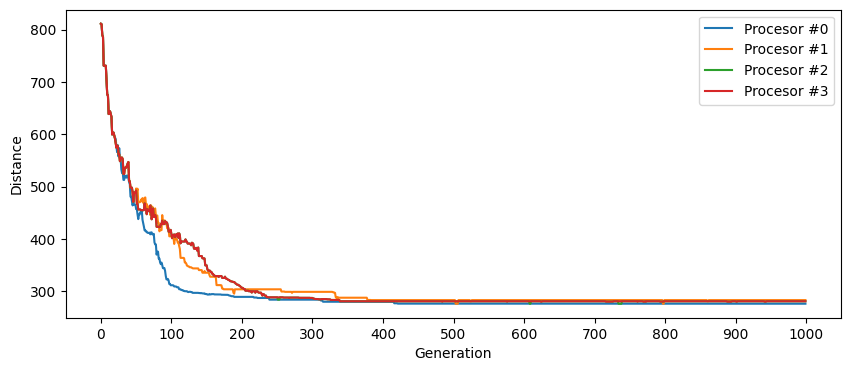

In [5]:
plt.figure(figsize=(10,4))
for i in range (len(distances)):
    d = np.loadtxt(distance_path+distances[i], unpack = True)
    plt.plot(d, label = "Procesor #{}".format(i))
plt.xlabel("Generation")
plt.ylabel("Distance")

plt.xticks(np.arange(0, len(d)+100, 100))
plt.legend()

In [6]:
data_0 = read_tsp_output(paths_path+"path_0.out")

In [7]:
for i in range(len(data_0)):
    x_p = []
    y_p = []
    for x, y in data_0[i]['path']:
        x_p.append(x)
        y_p.append(y)
    
    plt.figure(figsize=(5,5))
    plt.plot(x_p, y_p, "-o")
    plt.scatter(x_p[0], y_p[0], marker="*", color = "r", label = "start")
    plt.title("Generation {}".format(data_0[i]["gen_num"]))
    fname = "./fig/usa/plain/path{}.png".format(i)
    plt.legend()
    plt.savefig(fname)
    plt.close()


x_us = x_p
y_us = y_p

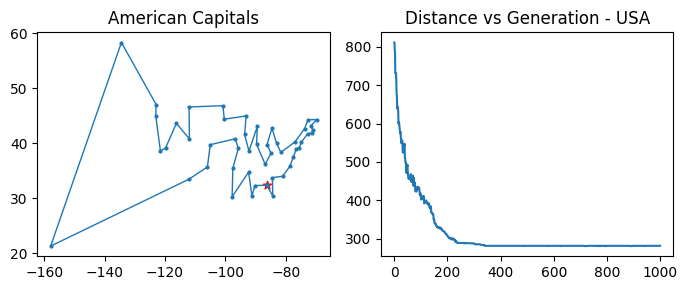

In [9]:
fig, axs = plt.subplots(1,2, figsize=(7,3))
axs[0].plot(x_us, y_us, "-o", markersize = 2, linewidth = 1)
axs[0].scatter(x_us[0], y_us[0], c = "r", marker = "*")
axs[0].set_title('American Capitals')
axs[1].plot(d, 'tab:blue')
axs[1].set_title('Distance vs Generation - USA')
fig.tight_layout()

In [10]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

for i in range(len(data_0)):
    x_p = []
    y_p = []
    for x, y in data_0[i]['path']:
        x_p.append(x)
        y_p.append(y)
        
    fig = px.line_geo(
        lat=y_p,
        lon=x_p,
        title="Generation {} {} distance = {}".format(data_0[i]["gen_num"], "\t\t", data_0[i]["gen_dist"]).expandtabs(),
  
    )

    fig.update_geos(
        resolution=110,
        
        showcoastlines=True, 
        showrivers=True,
        showlakes=True,
        showcountries=True, countrycolor="RebeccaPurple",
        showsubunits=True,
        subunitcolor="Blue",
        lataxis_range=[min(y_p) - 5, max(y_p) + 5],
        lonaxis_range=[min(x_p) - 5, max(x_p) + 5],
    )
    fig.add_trace(go.Scattergeo(
        lat=[y_p[0]],
        lon=[x_p[0]],
        mode='markers',
        marker=dict(size=10, color='red', symbol='circle'),
        name='Starting Point'
    ))
    
    num = str(i)

    num = num.zfill(3)
    fname = "./fig/usa/map/map_number_{}.png".format(num)
    pio.write_image(fig, fname, width=1920, height=1080)

## Testing the code

To further test the code it was applied to the Italian's capoluoghi di provincia, the result is shown below:

In [11]:
paths_path_ita = src_path+"out_ita/path/"
data_0 = read_tsp_output(paths_path_ita+"path_3.out")

In [12]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

for i in range(len(data_0)):
    x_p = []
    y_p = []
    for x, y in data_0[i]['path']:
        x_p.append(x)
        y_p.append(y)
        
    fig = px.line_geo(
        lat=y_p,
        lon=x_p,
        title="Generation {} {} distance = {}".format(data_0[i]["gen_num"], "\t\t", data_0[i]["gen_dist"]).expandtabs(),
  
    )

    fig.update_geos(
        resolution=110,
        
        showcoastlines=True, 
        showrivers=True,
        showlakes=True,
        showcountries=True, countrycolor="RebeccaPurple",
        showsubunits=True,
        subunitcolor="Blue",
        lataxis_range=[min(y_p) - 5, max(y_p) + 5],
        lonaxis_range=[min(x_p) - 5, max(x_p) + 5],
    )
    fig.add_trace(go.Scattergeo(
        lat=[y_p[0]],
        lon=[x_p[0]],
        mode='markers',
        marker=dict(size=10, color='red', symbol='circle'),
        name='Starting Point'
    ))
    
    num = str(i)

    num = num.zfill(3)
    fname = "./fig/ita/map/map_number_{}.png".format(num)
    pio.write_image(fig, fname, width=1920, height=1080)

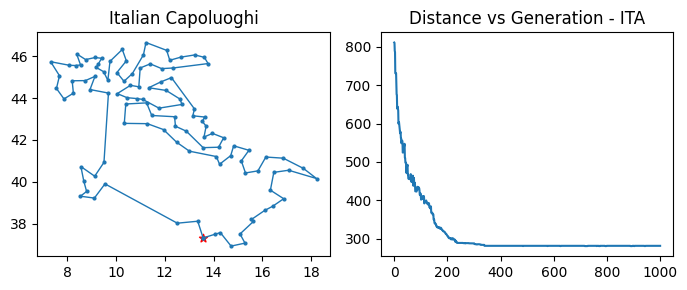

In [14]:
fig, axs = plt.subplots(1,2, figsize=(7,3))
axs[0].plot(x_p, y_p, "-o", markersize = 2, linewidth = 1)
axs[0].scatter(x_p[0], y_p[0], c = "r", marker = "*")
axs[0].set_title('Italian Capoluoghi')
axs[1].plot(d, 'tab:blue')
axs[1].set_title('Distance vs Generation - ITA')
fig.tight_layout()

## Map plots

The plots of the best pahts for each generation overlayed over a map of the USA and Italy can be found in the fig subfolders for both problems